## Directions: The dataset UN_cities_data.csv, provided by The Guardian newspaper, which contains data on the population of some of the world's largest cities, starting in 1950 and going through projections for 2025. Take the data, and try to apply what you learned to discover something interesting! Some ideas include: average city growth from year to year; which decade saw the fastest or slowest growth rates in a certain country, or worldwide; or anything else that you find interesting. Your project needs to involve loading the data into Python, running some analysis on it, and producing at least one visualization of your results. Good luck, and have fun!

In [1]:
# Import python packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in cities data
cities = pd.read_csv("UN_cities_data.csv", sep='\t')

In [3]:
cities.head()

,Country code,Country,City Code,Urban Agglomeration,Latitude,Longitude,1950,1955,1960,1965,...,2010,2015,2020,2025,"Cyclone risk (0=low, 3=high)",Drought risk,Earthquake risk,Flood risk,Landslide risk,Volcano risk
0,4,Afghanistan,20002,Kabul,34.54,69.17,128.931,184.622,264.803,368.809,...,3052.000,3402.137,4135.559,5125.916,0,3,1,3,0,0
1,12,Algeria,20006,El Djazaïr (Algiers),36.76,3.05,516.450,622.921,871.636,1081.394,...,2850.907,3202.959,3607.835,3976.732,0,2,1,2,0,0
2,12,Algeria,20035,Wahran (Oran),35.75,-0.63,268.935,286.368,304.936,324.697,...,775.666,825.859,920.440,1025.705,0,3,0,1,0,0
3,24,Angola,20050,Huambo,-12.76,15.75,15.306,23.818,37.069,47.875,...,1038.581,1345.176,1665.779,1996.751,0,3,0,0,0,0
4,24,Angola,20049,Luanda,-8.84,13.23,138.413,174.268,219.427,315.108,...,4790.142,6183.162,7555.184,8924.042,0,3,0,1,0,0


In [4]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 28 columns):
Country code                    633 non-null int64
Country                         633 non-null object
City Code                       633 non-null int64
Urban Agglomeration             633 non-null object
Latitude                        633 non-null float64
Longitude                       633 non-null float64
1950                            633 non-null float64
1955                            633 non-null float64
1960                            633 non-null float64
1965                            633 non-null float64
1970                            633 non-null float64
1975                            633 non-null float64
1980                            633 non-null float64
1985                            633 non-null float64
1990                            633 non-null float64
1995                            633 non-null float64
2000                            633 non-null float64


In [5]:
# Compute annual population growth for years with real data.
cities["Average_Annual_Growth_Rate"] = (cities["2010"] - cities["1950"])/(2010-1950)
cities.head()

,Country code,Country,City Code,Urban Agglomeration,Latitude,Longitude,1950,1955,1960,1965,...,2015,2020,2025,"Cyclone risk (0=low, 3=high)",Drought risk,Earthquake risk,Flood risk,Landslide risk,Volcano risk,Average_Annual_Growth_Rate
0,4,Afghanistan,20002,Kabul,34.54,69.17,128.931,184.622,264.803,368.809,...,3402.137,4135.559,5125.916,0,3,1,3,0,0,48.717817
1,12,Algeria,20006,El Djazaïr (Algiers),36.76,3.05,516.450,622.921,871.636,1081.394,...,3202.959,3607.835,3976.732,0,2,1,2,0,0,38.907617
2,12,Algeria,20035,Wahran (Oran),35.75,-0.63,268.935,286.368,304.936,324.697,...,825.859,920.440,1025.705,0,3,0,1,0,0,8.445517
3,24,Angola,20050,Huambo,-12.76,15.75,15.306,23.818,37.069,47.875,...,1345.176,1665.779,1996.751,0,3,0,0,0,0,17.054583
4,24,Angola,20049,Luanda,-8.84,13.23,138.413,174.268,219.427,315.108,...,6183.162,7555.184,8924.042,0,3,0,1,0,0,77.528817


In [6]:
# Create data series for plotting
x_Longitude = cities.Longitude
y_Latitude  = cities.Latitude
population_growth = cities["Average_Annual_Growth_Rate"]

C:\Users\jenkij\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


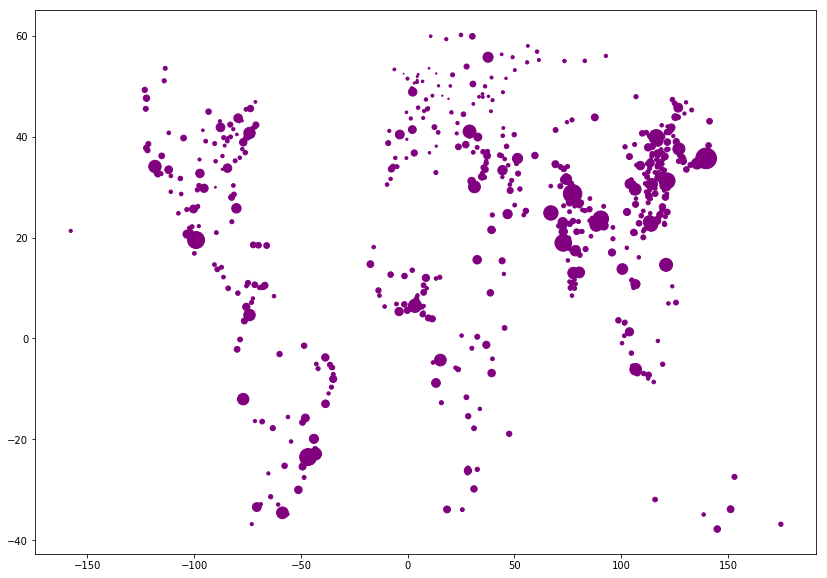

In [7]:
fig=plt.figure(figsize=(14,10))
ax=fig.add_subplot(111)
ax.scatter(x_Longitude,y_Latitude,s=population_growth, c="purple")

In [8]:
pop_stat = cities.groupby([(cities["Average_Annual_Growth_Rate"]), (cities.Longitude),
                          (cities.Latitude)]).max()

In [9]:
pop_stat.iloc[-10:, :4]

,,,Country code,Country,City Code,Urban Agglomeration
Average_Annual_Growth_Rate,Longitude,Latitude,,,,
174.384700,3.40,6.45,566,Nigeria,22007,Lagos
207.405367,67.05,24.87,586,Pakistan,22044,Karachi
222.136483,116.43,39.92,156,China,20464,Beijing
243.231450,90.41,23.72,50,Bangladesh,20119,Dhaka
254.218617,121.47,31.23,156,China,20656,Shanghai
276.077067,72.85,18.93,356,India,21206,Mumbai (Bombay)
287.651767,-99.12,19.50,484,Mexico,21853,Ciudad de México (Mexico City)
288.588800,-46.62,-23.53,76,Brazil,20287,São Paulo
342.762883,77.22,28.67,356,India,21228,Delhi


In [10]:
print("The data and the plot show the largest average annual growth rates in Japan and India.")

The data and the plot show the largest average annual growth rates in Japan and India.


In [11]:
cities.set_index("Average_Annual_Growth_Rate")

,Country code,Country,City Code,Urban Agglomeration,Latitude,Longitude,1950,1955,1960,1965,...,2010,2015,2020,2025,"Cyclone risk (0=low, 3=high)",Drought risk,Earthquake risk,Flood risk,Landslide risk,Volcano risk
Average_Annual_Growth_Rate,,,,,,,,,,,,,,,,,,,,,
48.717817,4,Afghanistan,20002,Kabul,34.540000,69.170000,128.931,184.622,264.803,368.809,...,3052.000,3402.137,4135.559,5125.916,0,3,1,3,0,0
38.907617,12,Algeria,20006,El Djazaïr (Algiers),36.760000,3.050000,516.450,622.921,871.636,1081.394,...,2850.907,3202.959,3607.835,3976.732,0,2,1,2,0,0
8.445517,12,Algeria,20035,Wahran (Oran),35.750000,-0.630000,268.935,286.368,304.936,324.697,...,775.666,825.859,920.440,1025.705,0,3,0,1,0,0
17.054583,24,Angola,20050,Huambo,-12.760000,15.750000,15.306,23.818,37.069,47.875,...,1038.581,1345.176,1665.779,1996.751,0,3,0,0,0,0
77.528817,24,Angola,20049,Luanda,-8.840000,13.230000,138.413,174.268,219.427,315.108,...,4790.142,6183.162,7555.184,8924.042,0,3,0,1,0,0
137.871817,32,Argentina,20058,Buenos Aires,-34.587500,-58.672500,5097.612,5799.223,6597.634,7317.169,...,13369.921,14150.653,14876.272,15524.248,0,1,0,3,0,0
18.383283,32,Argentina,20059,Córdoba,-31.400000,-64.183333,429.249,509.722,605.309,700.581,...,1532.246,1654.039,1775.596,1891.743,0,3,0,1,0,0
7.454167,32,Argentina,20065,La Plata,-34.931389,-57.948889,299.505,346.637,401.203,441.115,...,746.755,810.353,875.944,939.693,0,1,0,3,0,0
11.605750,32,Argentina,20068,Mendoza,-32.880000,-68.820000,245.797,284.087,328.355,393.888,...,942.142,1020.982,1101.162,1178.670,0,2,2,0,0,0


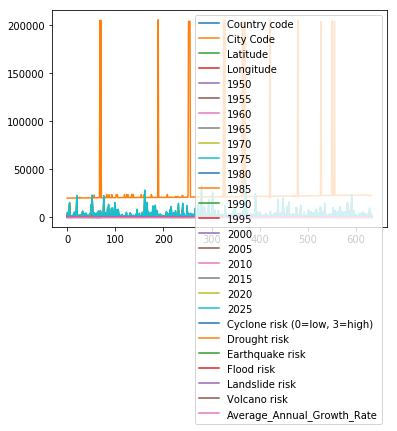

In [12]:
cities.plot()